# Checkpoint Two: Exploratory Data Analysis

Now that your chosen dataset is approved, it is time to start working on your analysis. Use this notebook to perform your EDA and make notes where directed to as you work.

## Getting Started

Since we have not provided your dataset for you, you will need to load the necessary files in this repository. Make sure to include a link back to the original dataset here as well.

My dataset:

Your first task in EDA is to import necessary libraries and create a dataframe(s). Make note in the form of code comments of what your thought process is as you work on this setup task.

In [3]:
# import the pandas library and use the alias 'pd', I am also importing seaborn matplot and numpy for visualizations
import pandas as pd

import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')

from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

# Create 3 new dataframes

NAICS = pd.read_csv('KS 2020-2021 NAICS Code.csv')
KS_tax = pd.read_csv('KS 2021 Sales Tax Revenue by County.csv')
national = pd.read_csv('selected-monthly-sales-tax-collections-data.csv')


## Get to Know the Numbers

Now that you have everything setup, put any code that you use to get to know the dataframe and its rows and columns better in the cell below. You can use whatever techniques you like, except for visualizations. You will put those in a separate section.

When working on your code, make sure to leave comments so that your mentors can understand your thought process.

In [36]:
#creating a variable for future use

KS_tax_columns = KS_tax.columns


In [35]:
may_taxes = KS_tax['May 2021'].describe() # I was unable to use desribe on the whole dataset so I am testing it on the columns. 
#Using these types of data frames will provide state totals for that particular month


,Unnamed: 13
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [32]:
KS_tax.columns # looking at the column names

Index(['City/County', 'January 2021', 'February 2021', 'March 2021',
       'April 2021', 'May 2021', 'June 2021', 'July 2021', 'August 2021',
       'September 2021', 'October 2021', 'November 2021', 'December 2021',
       'Unnamed: 13', 'CY Total'],
      dtype='object')

In [33]:
KS_tax.head() #seeing how the data displays

,City/County,January 2021,February 2021,March 2021,April 2021,May 2021,June 2021,July 2021,August 2021,September 2021,October 2021,November 2021,December 2021,Unnamed: 13,CY Total
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Allen County,"$179,656.95","$198,296.15","$198,852.35","$170,017.20","$220,698.15","$233,208.62","$207,534.60","$222,248.65","$245,825.97","$216,890.47","$164,501.77","$282,431.55",NaN,"$2,540,162.43"
2,Anderson County,"$99,419.17","$107,801.82","$92,757.01","$96,370.25","$122,369.53","$126,893.61","$114,436.59","$116,107.46","$122,823.17","$116,000.97","$109,329.40","$173,739.93",NaN,"$1,398,048.91"
3,Atchison County,"$185,101.29","$215,743.10","$205,204.58","$197,686.55","$221,956.34","$229,019.17","$211,991.30","$214,438.53","$228,991.91","$219,069.96","$191,141.28","$257,749.86",NaN,"$2,578,093.87"
4,Barber County,"$50,604.13","$52,913.17","$48,676.21","$51,192.55","$58,379.28","$62,516.17","$54,357.94","$53,762.62","$57,264.24","$55,271.06","$60,790.18","$81,992.53",NaN,"$687,720.08"


In [34]:
KS_tax.count() #seeing if all rows have the same amount of data and comparing it to the previous one as a guide

City/County       409
January 2021      409
February 2021     409
March 2021        409
April 2021        409
May 2021          409
June 2021         409
July 2021         409
August 2021       409
September 2021    409
October 2021      409
November 2021     409
December 2021     409
Unnamed: 13         0
CY Total          409
dtype: int64

In [20]:
# I am creating variables for future use


#checking overall statistics 
stats = national.describe()


#columns
national_columns = national.columns

#I need to rename these column names
State_Name = national['Name']
Tax_Amount = national['Amount']




In [19]:
national.columns #viewing the column names

Index(['Name', 'Collection Month', 'Year', 'Tax Type', 'Amount', 'FIPS State',
       'Numeric Month'],
      dtype='object')

In [18]:
national.describe() #viewing the data stats

,Year,Amount,FIPS State,Numeric Month
count,11781.000000,9.162000e+03,11781.000000,11781.000000
mean,2020.090909,2.826828e+08,28.960784,6.909091
std,0.792561,8.800411e+08,15.677501,3.306366
min,2019.000000,-2.174000e+08,1.000000,1.000000
25%,2019.000000,1.029016e+07,16.000000,4.000000
50%,2020.000000,4.892506e+07,29.000000,7.000000
75%,2021.000000,2.369788e+08,42.000000,10.000000
max,2021.000000,2.425489e+10,56.000000,12.000000


In [16]:
national.count() # comparing the amount of the data collected in each column to see if each column has the same amount of data

Name                11781
Collection Month    11781
Year                11781
Tax Type            11781
Amount               9162
FIPS State          11781
Numeric Month       11781
dtype: int64

In [26]:
NAICS_columns = NAICS.columns


# I am creating dataframes with the first two columns which also contain many of the null values. I may want to merge them later
codes = NAICS['NAICS Code']
Industries = NAICS['Unnamed: 0']




In [23]:
NAICS.columns

Index(['Unnamed: 0', 'NAICS Code', ' Locations ', 'Month of', 'Month of.1',
       'Percent', 'Fiscal Year 2021', 'Fiscal Year 2022', 'Percent.1'],
      dtype='object')

In [21]:
NAICS.head(6) # display the data I added the 6 to see the whole data for 1 industry

,Unnamed: 0,NAICS Code,Locations,Month of,Month of.1,Percent,Fiscal Year 2021,Fiscal Year 2022,Percent.1
0,NaN,NaN,NaN,November 2020,November 2021,Change,July - November 2020,July - November 2021,Change
1,"11 Agriculture, Forestry, Fishing and Hunting",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,111 Crop Production,10,"$4,745.95","$7,097.19",49.5%,"$25,549.22","$39,066.06",52.9%
3,NaN,112 Animal Production,11,"$6,351.24","$2,284.42",-64.0%,"$34,045.34","$31,309.63",-8.0%
4,NaN,115 Agriculture and Forestry Support Activities,6,"$10,419.29","$21,398.96",105.4%,"$87,421.06","$98,048.31",12.2%
5,2-digit Total,NaN,27,"$21,516.48","$30,780.57",43.1%,"$147,015.62","$168,424.00",14.6%


In [25]:
NAICS.count() # I understand based on the previous describe function that the null values are necessary

Unnamed: 0           46
NAICS Code           88
 Locations          110
Month of            111
Month of.1          111
Percent             106
Fiscal Year 2021    111
Fiscal Year 2022    111
Percent.1           106
dtype: int64

In [8]:
NAICS.columns # display column names

Index(['Unnamed: 0', 'NAICS Code', ' Locations ', 'Month of', 'Month of.1',
       'Percent', 'Fiscal Year 2021', 'Fiscal Year 2022', 'Percent.1'],
      dtype='object')

## Visualize

Create any visualizations for your EDA here. Make note in the form of code comments of what your thought process is for your visualizations.

Text(0.5, 1.0, 'NAICS Codes Null values in Yellow')

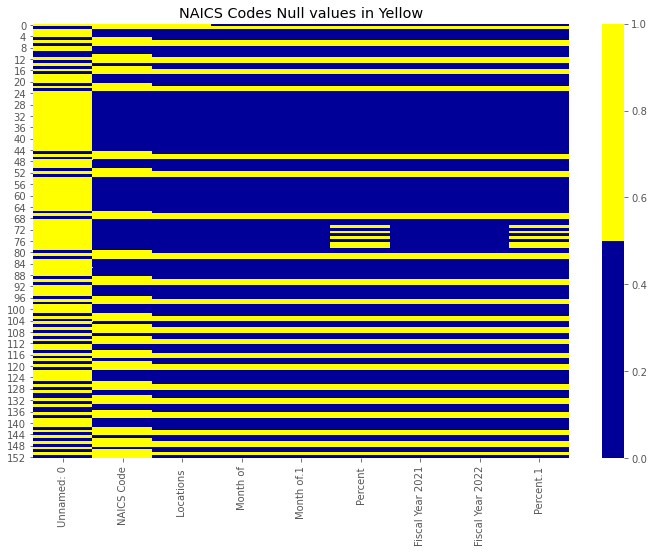

In [103]:
# I created a heatmap in order to know how to process it

NAICS_colors = ['#000099', '#ffff00'] # specify the colors - yellow is missing. blue is not missing.
sns.heatmap(NAICS[NAICS_columns].isnull(), cmap=sns.color_palette(NAICS_colors))
plt.title('NAICS Codes Null values in Yellow')

Text(0.5, 1.0, 'KS Taxes Null values in Yellow')

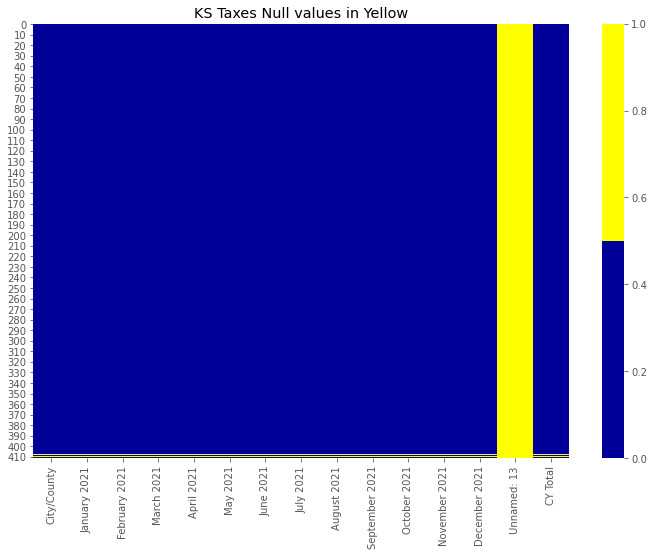

In [108]:
# I am creating a heatmap to show the null values. This will help me determine what to do with these

KS_tax_colors = ['#000099', '#ffff00'] # specify the colors - yellow is missing. blue is not missing.
sns.heatmap(KS_tax[KS_tax_columns].isnull(), cmap=sns.color_palette(KS_tax_colors))
plt.title('KS Taxes Null values in Yellow')

Text(0.5, 1.0, 'National Revenue by State Null values in Yellow')

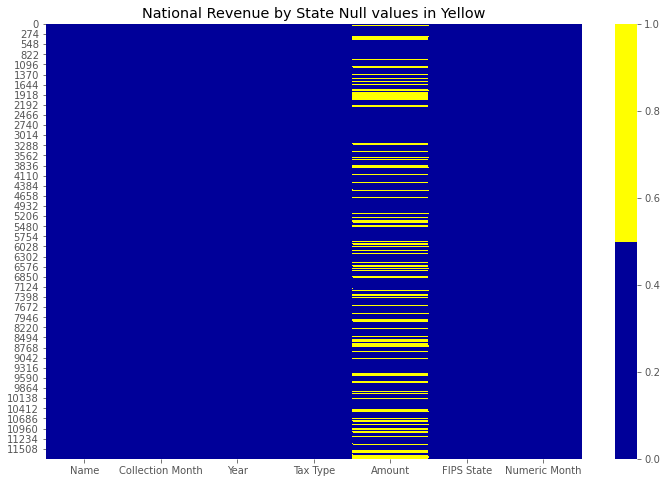

In [119]:
# I am creating a heatmap to show null values in order to know what to do with them


national_colors = ['#000099', '#ffff00'] # specify the colors - yellow is missing. blue is not missing.
sns.heatmap(national[national_columns].isnull(), cmap=sns.color_palette(national_colors))
plt.title('National Revenue by State Null values in Yellow')

## Summarize Your Results

With your EDA complete, answer the following questions.

1. Was there anything surprising about your dataset? 
2. Do you have any concerns about your dataset? 
3. Is there anything you want to make note of for the next phase of your analysis, which is cleaning data? 

The orignal datasets I used did not work well due to the formatting so I had to use a different set.

Concerns:
One of the concerns I have about the datasets is there are blank rows included. There values that are duplicates, but the data reprseneted by these labels are not duplicate values. 

NAICS data:
I will have to rename the unanmed row in the NAICS code data to show the name of the industry. I will also need to specify that this is specific to the State of Kansas. The Null values will need to stay in place in the unnamed row, but I would like to try to rename them to match the NAICS Code row. The '2-digit Total' value appears multiple times in the NAICS data, but this is not a duplicate it reprents the totals, so I will have to decide whether it is possible to rename it with a specific industry name for each instance, or drop it. This does provide a good check on using sum in when I am wanting to check a subsector within a sector. I may have to use an iteration. Deciding what to do with the null values and this duplicates will be my greatest challenge. I may try to merge NAICS code with the unnamed column

National data:
For the national data, I may want to reformat the amount in a dollar format. 

KS data: 
With this data set entire rows are null so I may need to drop them. Also there is a column that is entirely blank so I will need to drop this as well. I want to rename some of the  names of the columns in order to help with organizing the data